https://github.com/Student204161/computational-social-science-assignments

### Contributions:
Each member of the group has participated equally on the project.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import netwulf as nw
from networkx.algorithms import community
from community import community_louvain
import json
import random

# Part 1: Mixing Patterns and Assortativity

### Exercise 1: Mixing Patterns and Assortativity

# Part 2: Communities


### Exercise 2: Zachary's karate club:

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21]
[9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


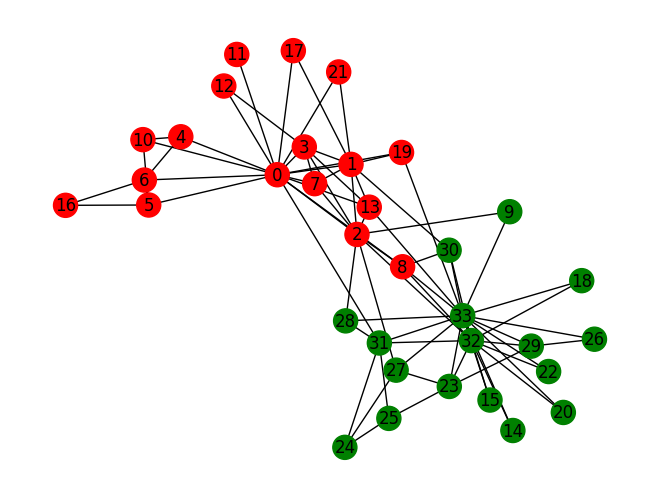

In [11]:
karate_data = nx.karate_club_graph()
club = {node: karate_data.nodes[node]["club"] for node in karate_data.nodes()}
nx.set_node_attributes(karate_data, club, "club")
MrHi = []
Officer = []
for i in range(len(club)):
    if club[i] == "Mr. Hi":
        MrHi.append(i)
    else:
        Officer.append(i)
node_colors = ['red' if club == 'Mr. Hi' else 'green' for club in club]
print(MrHi)
print(Officer)
color = []
for node in karate_data.nodes():
    if club[node] == "Mr. Hi":
        color.append("red")
    else:
        color.append("green")
config = {
    "Node color": node_colors,
    "Node size": 1,
    "Node stroke width": 0,
    "Edge width": 1,
    "Zoom": 0.5,
}
#visualize = nw.visualize(karate_data, config=config) 
# For some reasons does our 
nx.draw(karate_data, with_labels=True, node_color=color)
plt.show()

In [12]:
#Function to compute modularity
def calculate_modularity(karate_data, communities):
    total_edges = karate_data.number_of_edges()
    modularity_score = 0.0
    for community in communities:
        edges_within_community = karate_data.subgraph(community).number_of_edges()
        sum_of_degrees_in_community = sum(karate_data.degree(node) for node in community)
        proportion_of_edges_within_community = edges_within_community / total_edges
        proportion_of_sum_of_degrees = (sum_of_degrees_in_community / (2 * total_edges)) ** 2
        modularity_score += proportion_of_edges_within_community - proportion_of_sum_of_degrees
    return modularity_score

#### Modularity
The modularity of a network is a metric that assesses how effectively it is separated into communities. Modularity is defined as the difference between the actual number of edges within communities and the predicted number of edges if the network were randomly linked while keeping node degrees constant. In other words, modularity assesses how well the network is divided into dense clusters of nodes.

In [13]:
# To calculate the modularity we would need the communities
current_communities = [Officer, MrHi]
modularity_from_current_communities = calculate_modularity(karate_data, current_communities)
print(modularity_from_current_communities)

0.3582347140039447


In [14]:
def double_edge_swap_algorithm(original_graph, num_swaps):
    new_graph = original_graph.copy()
    for i in range(num_swaps):
        u1, v1 = random.choice(list(new_graph.edges()))
        u2, v2 = random.choice(list(new_graph.edges()))
        if (u1 != u2) and (v1 != v2) and (not new_graph.has_edge(u1, v2)) and (not new_graph.has_edge(u2, v1)):
            new_graph.remove_edges_from([(u1, v1), (u2, v2)])
            new_graph.add_edges_from([(u1, v2), (u2, v1)])
    return new_graph

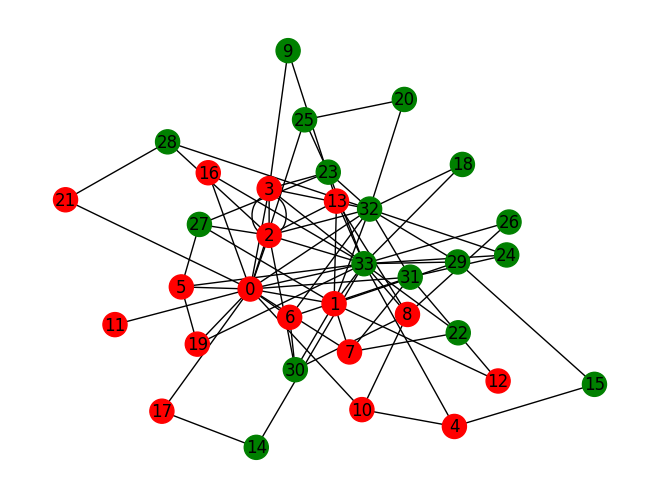

In [16]:
#double edge swap algorithm
new_graph = karate_data.copy()
num_edges = new_graph.number_of_edges()
karate_data_double_edge_swap = double_edge_swap_algorithm(karate_data, num_edges)
nx.draw(karate_data_double_edge_swap, with_labels=True, node_color=color)
plt.show()  

In [17]:
original_degrees = [degree for node, degree in karate_data.degree()]
new_degrees = [degree for node, degree in karate_data_double_edge_swap.degree()]
print("Original:", original_degrees)
print("New     :", new_degrees)
a = calculate_modularity(karate_data_double_edge_swap, current_communities)
print("Molarity of double edge swap:",a)

Original: [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
New     : [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
Molarity of double edge swap: 0.024901380670611373


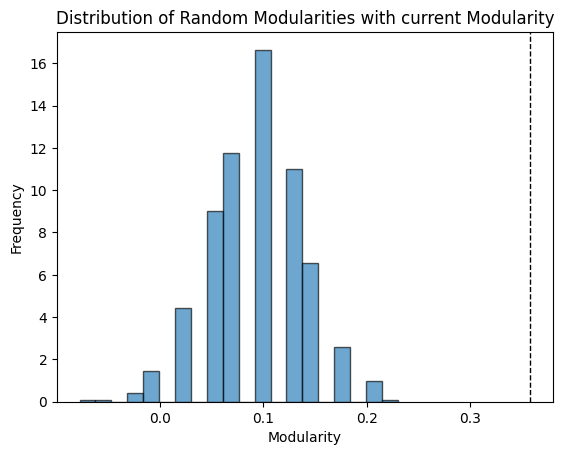

random network mean: 0.09571404012238173
random network std: 0.044969441414557915
random network current_Modularity: [0.050542406311637006, 0.07618343195266267, 0.07618343195266267, 0.024901380670611373, 0.07618343195266267, 0.10182445759368833, 0.10182445759368833, 0.050542406311637006, 0.10182445759368833, 0.10182445759368833, 0.07618343195266267, 0.024901380670611373, 0.07618343195266267, 0.10182445759368833, 0.1531065088757396, 0.10182445759368833, 0.050542406311637006, 0.07618343195266267, 0.17874753451676526, 0.050542406311637006, 0.024901380670611373, 0.050542406311637006, 0.07618343195266267, 0.10182445759368833, 0.12746548323471393, 0.1531065088757396, 0.050542406311637006, 0.1531065088757396, 0.17874753451676526, 0.12746548323471393, 0.10182445759368833, 0.12746548323471393, 0.10182445759368833, 0.050542406311637006, 0.050542406311637006, 0.10182445759368833, 0.12746548323471393, 0.024901380670611373, 0.10182445759368833, 0.10182445759368833, 0.1531065088757396, 0.12746548323

In [18]:
# 1000 randomized version of the Karate Club network of the double edge swap algorithm
num_iterations = 1000
modularities = []
for i in range(num_iterations):
        current_graph = double_edge_swap_algorithm(karate_data, num_edges)
        current_modularity = calculate_modularity(current_graph, current_communities)
        modularities.append(current_modularity)
mean = np.mean(modularities)
std = np.std(modularities)
plt.hist(modularities, bins=20, alpha=0.65, density=True,edgecolor='k')
plt.axvline(x=modularity_from_current_communities, color='k',linestyle='dashed', linewidth=1)
plt.xlabel('Modularity')
plt.ylabel('Frequency')
plt.title('Distribution of Random Modularities with current Modularity')
plt.show()
#Compute the average and standard deviation of the modularity for the random network
print("random network mean:", mean)
print("random network std:", std)
print("random network current_Modularity:",modularities)
if modularity_from_current_communities < mean - 2 * std or modularity_from_current_communities > mean + 2 * std:
    print("Modularity value is significantly different")
else: 
    print("Modularity value is not significantly different")

We can observe that this partitioning becomes a normal distribution. The reason we keep the degree is to show that the structure/pattern stays the same which means that the interactions within the karate club also keeps its form. We learn the effect of the degree and that even through the networks randomized versions it still stays close to the same structure.

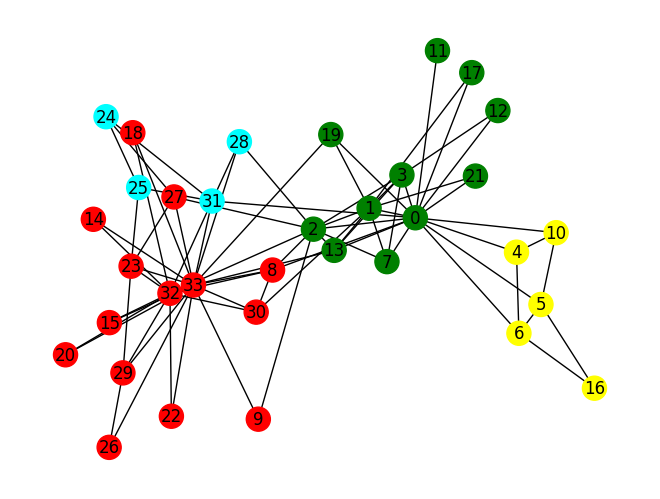

In [19]:
#Louvain-algorithm implementation
partition = community_louvain.best_partition(karate_data)
louvain_colors = ["green", "red", "yellow", "cyan"]
node_color = [louvain_colors[partition[i]] for i in range(len(karate_data.nodes()))]
nx.draw(karate_data, with_labels=True, node_color=node_color)
plt.show()

In [20]:
louvain_molarities = community_louvain.modularity(partition,karate_data)
print("Louvain:",louvain_molarities)
print("current_Modularity:",modularity_from_current_communities)

Louvain: 0.4438541256723075
current_Modularity: 0.3582347140039447


That implies that the Louvain approach discovered a better community structure for the network in issue than the other techniques utilized. It might also imply that the Louvain technique is better suited to evaluating the specific sort of network under consideration.

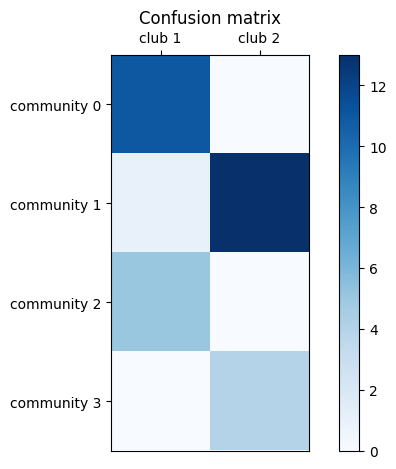

In [21]:
# Confusion Matrix
num_communities = max(partition.values()) + 1
num_groups = len(set(club.values()))
D = [[0 for j in range(num_groups)] for i in range(num_communities)]
for node in karate_data.nodes():
    community_index = partition[node]
    group_index = 0 if club[node] == "Mr. Hi" else 1
    D[community_index][group_index] += 1

fig, ax = plt.subplots()
im = ax.imshow(D, cmap="Blues")

# Add labels
ax.set_xticks(np.arange(num_groups))
ax.set_yticks(np.arange(num_communities))
ax.set_xticklabels(["club 1", "club 2"])
ax.set_yticklabels(["community {}".format(i) for i in range(num_communities)])
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set the title and show the plot
ax.set_title("Confusion matrix")
fig.tight_layout()
plt.show()

The Louvain method separates the two groups quite well, however there are a few misclassifications. With just one misclassified node, community 0 almost exactly conforms to group 0. While community 1 and group 1 overlap extensively, a few nodes from group 0 are nonetheless allocated to community 1.

### Exercise 3: Community detection on the network of Computational Social Scientists

In [22]:
with open('week4graph.pickle', 'rb') as f:
    G = pickle.load(f)

nx_G = nx.Graph(G)

nx_G.add_nodes_from(G.nodes())
nx_G.add_edges_from(G.edges())

num_communities:126 


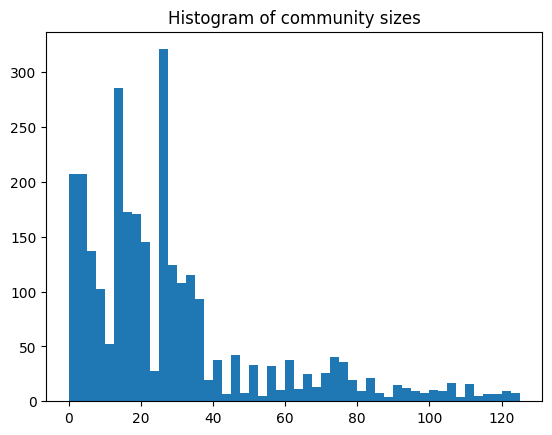

In [24]:
best_partition = community_louvain.best_partition(nx_G)
communities_generator = community.girvan_newman(nx_G)

print(f'num_communities:{max(best_partition.values()) + 1} ')

plt.hist(best_partition.values(), bins = 50)
plt.title('Histogram of community sizes')
plt.show()

Number of communities is 125 and their sizes can be visualized in histogram above. The modularity is calculated below as 0.28. The Wald 95% CI for the expected modularity in a sampled community is 0.28 +- 0.006 but by inspecting the above histogram, it might not be reasonable to assume normality. Therefore a non-parametric boostrap with N = 1000 is calculated and a 95% CI found using quantiles 2.5% and 97.5% quantiles: [0.214, 0.353]

 Modularity is significant from 0.

In [25]:
communities = {}
for node in best_partition:
    if best_partition[node] not in communities:
        communities[best_partition[node]] = [node]
    else:
        communities[best_partition[node]].append(node)

def modularity(G, communities):
    m = G.number_of_edges()
    q = {}
    for c in communities:
        lc = len(communities[c])
        kc = sum(G.degree(n) for n in communities[c])

        q[c] = lc/m - (kc/(2*m))**2
    return q

q = sum(modularity(G, communities).values())
conf_int = 1.96 * np.std(list(modularity(G, communities).values())) #Wald 95% CI for the expected modularity in a sampled community.
print(f'bad estimate! Wald CI modularity:{q} + - {conf_int}')

#non-parametric bootstrapped modularity estimate
def bootstrap_modularity(G, communities, n):
    q = []
    for i in range(n):
        new_communities = {}
        groups = list(communities.keys())
        sample_nums = random.choices(groups, k = len(groups))
        for c in communities:
             new_communities[c] = communities[sample_nums[c]]
        q.append(sum(modularity(G, new_communities).values()))
    return q
q_boot = bootstrap_modularity(G, communities, 1000)
#quantiles. 2.5% and 97.5%
q_boot.sort()
print(f'non-parametric boostrap 95% CI for modularity: [{q_boot[25]} , {q_boot[975]}]')

bad estimate! Wald CI modularity:0.27714911398528586 + - 0.00653842197640448
non-parametric boostrap 95% CI for modularity: [0.20933836100731879 , 0.35674165874009034]


In [28]:
from matplotlib import colors as colors

num_communities = max(best_partition.values()) + 1
community_colors = {i: f'#{j:x}' for i, j in zip(range(num_communities), np.random.randint(256**3, size=num_communities))}

node_colors = [community_colors[best_partition[node]] for node in G.nodes()]
config = { "Node color": node_colors, "Node size": 1, "Node stroke width": 0, "Edge width": 1,"Zoom": 0.5,}
#nw.visualize(G)

#Visualize network
best_partition = community_louvain.best_partition(nx_G)
sizes = [len(c) for c in best_partition]
G_where = np.array(nx_G.nodes)

degreeColor = np.empty(len(G_where), dtype=object)
valueToPlot = np.log10(sizes)

valueToPlotRescaled = 255*(valueToPlot - np.min(valueToPlot))/np.max(valueToPlot)

for size, c in zip(sizes, best_partition):
    for node in c:
        color = '#%02x%02x%02x' % (int(size), 0, 50)
        degreeColor[np.where(G_where == node)] = color
dictionaryColor = dict(zip(list(nx_G.nodes), degreeColor))
for node, group in dictionaryColor.items():
    dictionaryColor[node] = str(group)
nx.set_node_attributes(nx_G, dictionaryColor, 'group')
#nw.visualize(G)
#nw.visualize(nx_G)

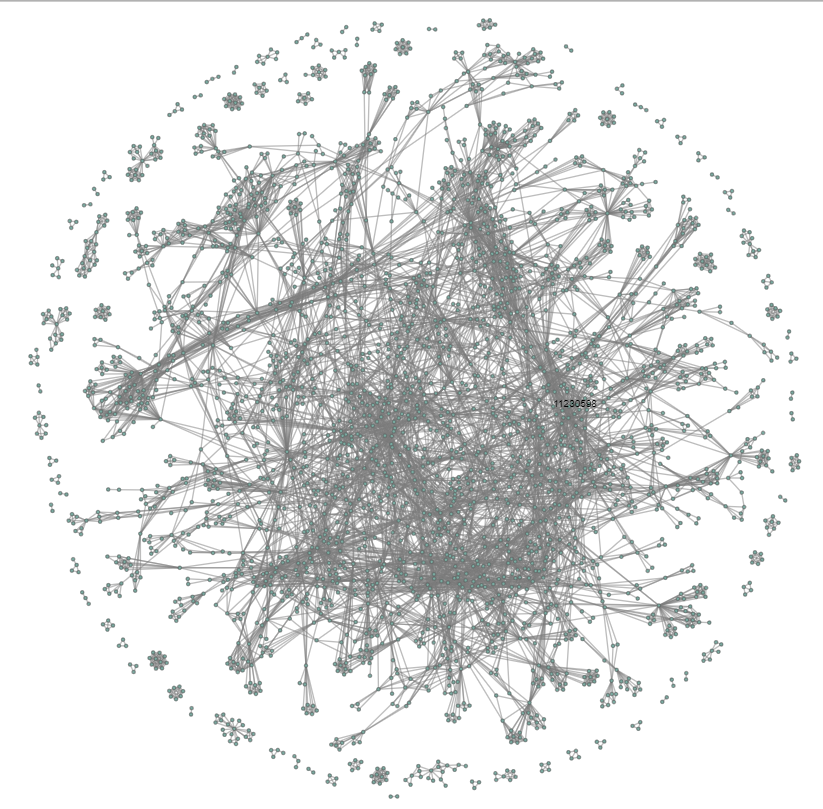

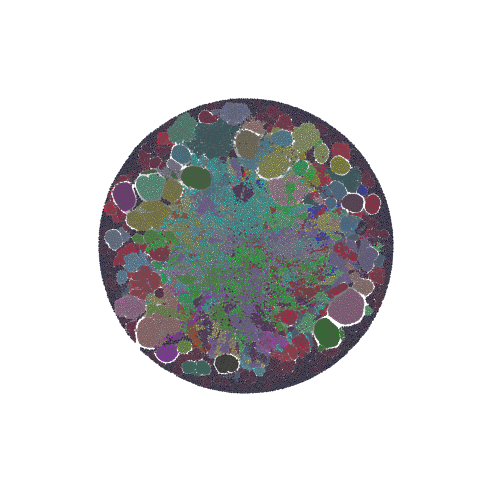

The graph can be seen to showcase what would look like a big circle. The edge of this circle shows alot of communities with only a few links to one another. While the majority of the inside of the network seems to have communities with alot of connections to one another.

In [ ]:
#Save the assignment of authors to communities.
import json
with open('best_partition.json', 'w') as f:
        json.dump(best_partition, f)
with open('communities.json', 'w') as f:
     json.dump(communities, f)